In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

C:\Users\JANAK RAJ OJHA\AppData\Roaming\Python\Python310\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [35]:
data.reset_index(inplace=True)

In [36]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3036,2024-01-29,153.639999,155.199997,152.919998,154.839996,154.839996,20909300
3037,2024-01-30,154.009995,155.039993,152.774994,153.050003,153.050003,26578900
3038,2024-01-31,145.389999,145.589996,141.550003,141.800003,141.800003,43908600
3039,2024-02-01,143.690002,144.619995,142.259995,142.710007,142.710007,25443500


In [37]:
ma_100_days = data.Close.rolling(100).mean()

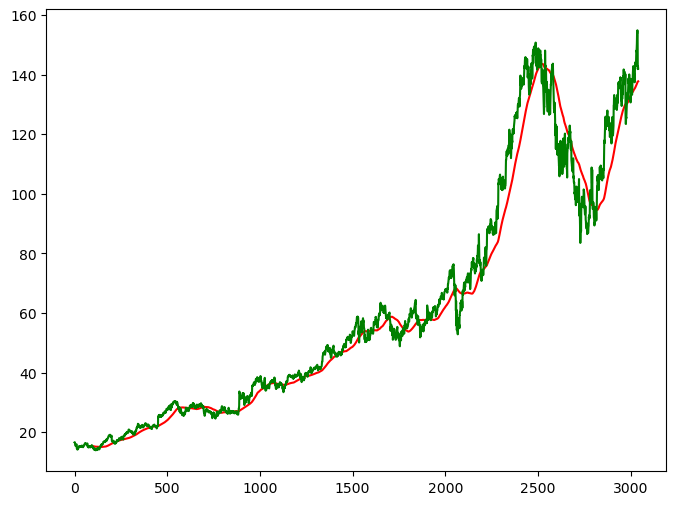

In [38]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [39]:
ma_200_days = data.Close.rolling(200).mean()

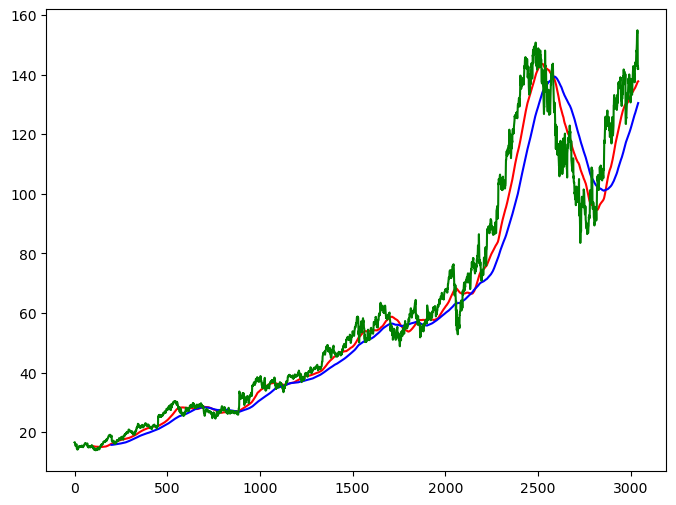

In [40]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [41]:
data.dropna(inplace=True)

In [42]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [43]:
data_train.shape[0]

2432

In [44]:
data_test.shape[0]

609

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [46]:
data_train_scale = scaler.fit_transform(data_train)

In [47]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [48]:
x, y = np.array(x), np.array(y)

In [49]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [50]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [51]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [52]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
73/73 [==============================] - 30s 275ms/step - loss: 0.0148
Epoch 2/50
73/73 [==============================] - 20s 276ms/step - loss: 0.0039
Epoch 3/50
73/73 [==============================] - 20s 277ms/step - loss: 0.0033
Epoch 4/50
73/73 [==============================] - 19s 266ms/step - loss: 0.0026
Epoch 5/50
73/73 [==============================] - 20s 278ms/step - loss: 0.0026
Epoch 6/50
73/73 [==============================] - 20s 280ms/step - loss: 0.0027
Epoch 7/50
73/73 [==============================] - 20s 269ms/step - loss: 0.0028
Epoch 8/50
73/73 [==============================] - 19s 263ms/step - loss: 0.0024
Epoch 9/50
73/73 [==============================] - 20s 271ms/step - loss: 0.0023
Epoch 10/50
73/73 [==============================] - 19s 265ms/step - loss: 0.0019
Epoch 11/50
73/73 [==============================] - 19s 264ms/step - loss: 0.0023
Epoch 12/50
73/73 [==============================] - 19s 265ms/step - loss: 0.0023
Epoch 13/50
7

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [65]:
pas_100_days = data_train.tail(100)

In [66]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [67]:
data_test_scale  =  scaler.fit_transform(data_test)

In [68]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [69]:
y_predict = model.predict(x)

23/23 [==============================] - 2s 95ms/step


In [70]:
scale =1/scaler.scale_

In [71]:
y_predict = y_predict*scale

In [72]:
y = y*scale

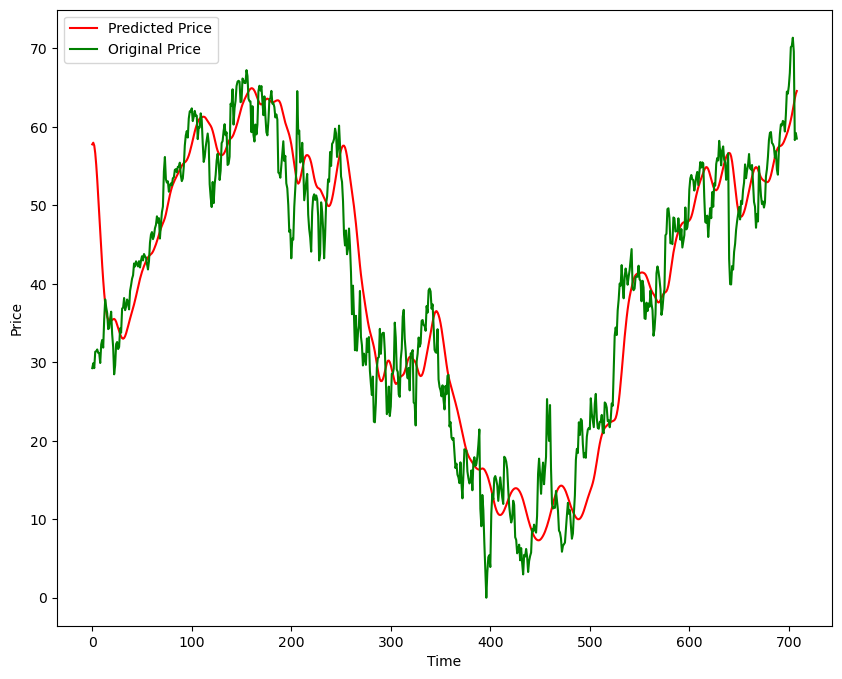

In [73]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [74]:
model.save('Stock Predictions Model.keras')